# TODO

- change arm_df name to all_years_armd_df or all_years_im_df
- perhaps ImpactTrajectory or ImpactMetrics instead of RiskMertics
- Update the calc_measure_cash_flows_df

# CB Refactoring

In [1]:
import numpy as np

from climada.util.api_client import Client
from climada.entity import ImpactFunc

from climada.entity import LitPop

import copy
client = Client()


## Parameters

In [2]:
# Parameters
ctr_str = 'DEU'

# Years to be considered
years = [2000, 2020, 2050]

# Step 1. Create the snapshot collection 
- Exposure, Hazard sets, Impact Functions

### Exposure

In [3]:
exp_hist = LitPop().from_countries(countries=ctr_str, reference_year=years[0])

# Assign random Group_id of 3 possible to the gdf
reg_id_arr = np.random.randint(0, 3, exp_hist.gdf.shape[0])
exp_hist.gdf['region_id'] = reg_id_arr

# Present
exp_pres = LitPop().from_countries(countries=ctr_str, reference_year=years[1])
# Assign the region_ids
exp_pres.gdf['region_id'] = reg_id_arr

# Future
exp_fut =copy.deepcopy(exp_pres)
# Exponential growth
exp_growth_rate = 0.01
exp_fut.gdf.value = exp_fut.gdf.value * (1 + exp_growth_rate)**(years[2] - years[1])
# Assign the region_ids
exp_fut.gdf['region_id'] = reg_id_arr

2024-06-19 09:58:24,537 - climada.entity.exposures.litpop.litpop - INFO - 
 LitPop: Init Exposure for country: DEU (276)...

2024-06-19 09:58:24,564 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-06-19 09:58:24,574 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-06-19 09:58:24,585 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-06-19 09:58:24,596 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-06-19 09:58:24,605 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-06-19 09:58:24,616 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-06-19 09:58:24,626 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-06-19 09:58:24,635 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2024-06-19 09:58:24,645 - climada.entity.exposures.litpop.gpw_population - 

## Hazard sets

In [4]:
haz_fl_1980 = client.get_hazard(
    hazard_type='river_flood',
    properties={
        'climate_scenario' : 'historical',
        'year_range': '1980_2000',
        'country_iso3alpha': 'DEU'
    })

haz_fl_2010 = client.get_hazard(
    hazard_type='river_flood',
    properties={
        'climate_scenario' : 'rcp85',
        'year_range': '2010_2030',
        'country_iso3alpha': 'DEU'
    })

haz_fl_2030 = client.get_hazard(
    hazard_type='river_flood',
    properties={
        'climate_scenario' : 'rcp85',
        'year_range': '2030_2050',
        'country_iso3alpha': 'DEU'
    })

2024-06-19 09:58:36,009 - climada.hazard.io - INFO - Reading /Users/vwattin/climada/data/hazard/river_flood/river_flood_150arcsec_hist_DEU_1980_2000/v2/river_flood_150arcsec_hist_DEU_1980_2000.hdf5
2024-06-19 09:58:41,316 - climada.hazard.io - INFO - Reading /Users/vwattin/climada/data/hazard/river_flood/river_flood_150arcsec_rcp85_DEU_2010_2030/v3/river_flood_150arcsec_rcp85_DEU_2010_2030.hdf5
2024-06-19 09:58:46,877 - climada.hazard.io - INFO - Reading /Users/vwattin/climada/data/hazard/river_flood/river_flood_150arcsec_rcp85_DEU_2030_2050/v3/river_flood_150arcsec_rcp85_DEU_2030_2050.hdf5


### Impact Functions

array([<Axes: title={'center': 'RF 1: Flood Africa JRC Residential noPAA'}, xlabel='Intensity (m)', ylabel='Impact (%)'>,
       <Axes: title={'center': 'RF 2: Flood Asia JRC Residential noPAA'}, xlabel='Intensity (m)', ylabel='Impact (%)'>],
      dtype=object)

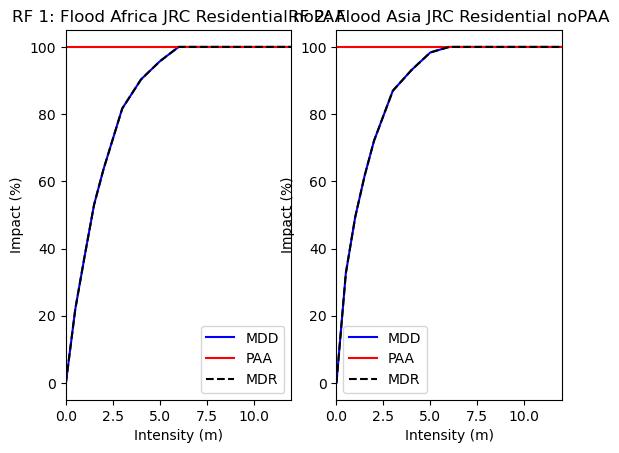

In [5]:
from climada_petals.entity.impact_funcs.river_flood import ImpfRiverFlood, flood_imp_func_set
from climada.entity import ImpactFunc, ImpactFuncSet

impf_set_flood = flood_imp_func_set()

impf_1 = impf_set_flood.get_func(fun_id=1, haz_type='RF')
impf_2 = impf_set_flood.get_func(fun_id=2, haz_type='RF')
impfset = ImpactFuncSet([impf_1, impf_2])


impfset.plot()

### Assign Impact Functions ID

In [6]:
def assign_impfid(exp_hist, exp_pres, exp_fut, case='single'):
    if case=='single':
        exp_hist.gdf['impf_RF'] = 1
        exp_pres.gdf['impf_RF'] = 1
        exp_fut.gdf['impf_RF'] = 1
    if case=='multiple_spatial':
        exp_hist.gdf.loc[:len(exp_hist.gdf/2),'impf_RF'] = 1
        exp_pres.gdf[:len(exp_pres.gdf/2),'impf_RF'] = 1
        exp_fut.gdf[:len(exp_fut.gdf/2),'impf_RF'] = 1
        exp_hist.gdf.loc[len(exp_hist.gdf/2):,'impf_RF'] = 2
        exp_pres.gdf[len(exp_pres.gdf/2):,'impf_RF'] = 2
        exp_fut.gdf[len(exp_fut.gdf/2):,'impf_RF'] = 2
    if case=='multiple_temp':
        exp_hist.gdf['impf_RF'] = 1
        exp_pres.gdf['impf_RF'] = 1
        exp_fut.gdf['impf_RF'] = 2
    if case == ' multiple':
        exp_hist.gdf.loc[:len(exp_hist.gdf/2),'impf_RF'] = 1
        exp_pres.gdf[:len(exp_hist.gdf/2),'impf_RF'] = 2
        exp_fut.gdf[:len(exp_hist.gdf/2),'impf_RF'] = 1
        exp_hist.gdf.loc[len(exp_hist.gdf/2):,'impf_RF'] = 2
        exp_pres.gdf[len(exp_hist.gdf/2):,'impf_RF'] = 1
        exp_fut.gdf[len(exp_hist.gdf/2):,'impf_RF'] = 2

### Create the Snapshot Collection

In [7]:
from climada.engine.impact_trajectories import Snapshot, SnapshotsCollection

assign_impfid(exp_hist, exp_pres, exp_fut, case='single')
assign_impfid(exp_hist, exp_pres, exp_fut, case='multiple')

hazard_list = [haz_fl_1980, haz_fl_2010, haz_fl_2030]
exposure_list = [exp_hist, exp_pres, exp_fut]
snapshot_years = years

snapshots = SnapshotsCollection.from_lists( hazard_list, exposure_list, impfset, snapshot_years)

# Create an arr
snap_years_range = np.array(range(snapshots.snapshots_years[0], snapshots.snapshots_years[-1]+1))


### Define the measures

In [8]:
# Define the measure
from climada.entity.measures.base import Measure, helper_hazard, helper_impfset, helper_exposure
from climada.entity.measures import MeasureSet

# Add to measure set list
meas_list = []

# Measure
haz_func = helper_hazard(0.8, 0)
exp_func = helper_exposure(reassign_impf_id=1, haz_type='RF')
impfset_func = helper_impfset(haz_type='RF')
# CostIncome attributes
cost_inc_attr_dict = {'mkt_price_year': 2000, 'init_cost': -1_000_000, 'annual_cost': -50_000, 'annual_income': 30_000, 'cost_growth_rate': 0.02, 'income_growth_rate': 0.07}

meas1 = Measure(
    name='Hazard_Int_Red_08', start_year=2018, end_year=2020,
    exposures_change=exp_func, impfset_change=impfset_func, hazard_change=haz_func, haz_type = 'RF', 
    **cost_inc_attr_dict
    )
meas_list.append(meas1)

# Measure
haz_func = helper_hazard(0.7, 0)
exp_func = helper_exposure(reassign_impf_id=1, haz_type='RF')
impfset_func = helper_impfset(haz_type='RF', impf_mdd_modifier={2: (0.6, 0)})
# CostIncome attributes
cost_inc_attr_dict = {'mkt_price_year': 2000, 'init_cost': -1_200_000, 'annual_cost': -60_000, 'annual_income': 35_000, 'cost_growth_rate': 0.02, 'income_growth_rate': 0.07}

meas2 = Measure(
    name='Hazard_Int_Red_07', start_year=2025, end_year=2048,
    exposures_change=exp_func, impfset_change=impfset_func, hazard_change=haz_func, haz_type = 'RF',
    **cost_inc_attr_dict
    )
meas_list.append(meas2)

# Measure
haz_func = helper_hazard(0.6, 0)
exp_func = helper_exposure(reassign_impf_id=1, haz_type='RF')
impfset_func = helper_impfset(haz_type='RF', impf_mdd_modifier={2: (0.6, 0)})
# CostIncome attributes
cost_inc_attr_dict = {'mkt_price_year': 2000, 'init_cost': -1_500_000, 'annual_cost': -10_000, 'annual_income': 40_000, 'cost_growth_rate': 0.02, 'income_growth_rate': 0.07}
meas3 = Measure(
    name='Hazard_Int_Red_06', start_year=2042, end_year=2048,
    exposures_change=exp_func, impfset_change=impfset_func, hazard_change=haz_func, haz_type = 'RF',
    **cost_inc_attr_dict
    )
meas_list.append(meas3)


# Create the measure set
measure_set = MeasureSet(meas_list)

# Create a combined measure set
meas_combo = measure_set.combine()

# Apply the measure
meas_combo.apply(exp_hist, impfset, haz_fl_1980)


(<climada.entity.exposures.litpop.litpop.LitPop at 0x1c2371970>,
 <climada.hazard.base.Hazard at 0x1c2fccdf0>)

## Get the necessary combos to consider overlapping time frames

### Create a combo set 

In [9]:
def include_combos_in_measure_set(measure_set, *other_combos, all_measures=True ):
    """
    Generate possible combinations of measures in a measure set

    Parameters
    ----------
    measure_set : MeasureSet
        The measure set to be combined
    all_measures : bool
        If True, all measures are combined
    other_combos : list
        List of lists of measures to be combined

    Returns
    -------
    dict
        Dictionary of combined measures
    """

    # Make a copy of the measure set
    new_measure_set = copy.deepcopy(measure_set)

    # Combine all measures
    if all_measures:
        meas_combo = new_measure_set.combine(combo_name='all')
        new_measure_set.append(meas_combo)

    # Combine other measures
    for combo in other_combos:
        meas_combo = new_measure_set.combine(names=combo)
        new_measure_set.append(meas_combo)

    return new_measure_set

# Generate the combo sets
#measure_set = include_combos_in_measure_set( measure_set)
#measure_set._data


# Step 2.  Calculate the ALL Annual Risk Metrics (Calc Riks Metrics) without considering start and end times

- Generates the risk metrics object that stores:
    - arm_df (annual impact metrics for all years)
    - arm_static_dict (annual impact metrics for all years static)
    - Measure_set
- Input 
    - Old rm_df (perhaps not)
    - Snapshots
    - MeasureSet


## Calculate the annual risk metrics for all years

### Utility functions

In [10]:
# Make a function that takes a snapshots collection and calculate the annual risk for each year
from climada.engine.impact_trajectories import CalcImpactsSnapshots
import pandas as pd

BASE_arm_df_COLUMNS = ['measure', 'group', 'year', 'metric', 'result']

# There should ba a function that takes a snapshot and returns the risk metrics in a dataframe
def make_static_snapshot(snapshot, stat_obj = 'hazard'):
    # Make a deep copy of the snapshot
    static_snapshot = copy.deepcopy(snapshot)

    # Change the exposure, hazard and impfset for the affected snapshot years
    hazard_list = []
    exposure_list = []
    snapshot_years = []

    # Get the snapshot object in the snapshot collection
    for idx, snap in enumerate(snapshots.data):

        # Save the hazard and exposure for the first snapshot year
        if idx == 0:
            static_hazard = snap.hazard
            static_exposure = snap.exposure
            # Save the impfset
            impfset = snap.impfset
        
        # Append the new exposure, hazar, impfset and snapshot year
        if stat_obj == 'hazard':
            hazard_list.append(static_hazard)
            exposure_list.append(snap.exposure)
        elif stat_obj == 'exposure':
            hazard_list.append(snap.hazard)
            exposure_list.append(static_exposure)
        elif stat_obj == 'impfset':
            hazard_list.append(snap.hazard)
            exposure_list.append(snap.exposure)
        
        # Append the snapshot year
        snapshot_years.append(snap.year)
            
        # Create a new snapshot collection for the measure case
        static_snapshots = SnapshotsCollection.from_lists( hazard_list, exposure_list, impfset, snapshot_years)
        
    return static_snapshots

# Make measure snapshot
def make_measure_snapshot(snapshots, measure):

    # Change the exposure, hazard and impfset for the affected snapshot years
    hazard_list = []
    exposure_list = []
    snapshot_years = []

    for snap in snapshots.data:
        # Apply the measure on all the snapshots
        exp_new, impfset_new, haz_new = measure.apply(snap.exposure, snap.impfset, snap.hazard)

        # Append the new exposure, hazar, impfset and snapshot year
        hazard_list.append(haz_new)
        exposure_list.append(exp_new)
        impfset = impfset_new # The impfset is the same for all the snapshots
        snapshot_years.append(snap.year)

    # Create a new snapshot collection for the measure case
    meas_snapshots = SnapshotsCollection.from_lists( hazard_list, exposure_list, impfset, snapshot_years)
        
    return meas_snapshots

def calc_annual_risk_metrics(snapshots, measure = None, risk_metrics = ['aai', 'rp', 'eai']):

    # Store the annual risk results in the dataframe where 'year' nan is for path-dependent results and group 'nan' is for aggregated results
    arm_df = pd.DataFrame(columns=BASE_arm_df_COLUMNS)

    # Check if measure is applied
    if measure:
        snapshots = make_measure_snapshot(snapshots, measure)
        measure_name = measure.name
    else:
        measure_name = 'no_measure'

    # Store the years
    year = np.array(range(snapshots.snapshots_years[0], snapshots.snapshots_years[-1]+1))

    # Calculate the risk metrics for the snapshots
    for risk_metric in risk_metrics:
        temp_arm_df = arm_df.copy()
        if risk_metric == 'aai':
            metric = 'aai'
            result = CalcImpactsSnapshots(snapshots).calc_all_years()
            # Populate the dataframe
            temp_arm_df['result'] = result
            temp_arm_df['year'] = year
            temp_arm_df['metric'] = metric
            temp_arm_df['group'] = np.nan
            temp_arm_df['measure'] = measure_name
            # Concatenate the results to the main df if
            if arm_df.empty:
                arm_df = temp_arm_df
            else:
                arm_df = pd.concat([arm_df, temp_arm_df])
                # Reset the index
                arm_df.reset_index(drop=True, inplace=True)
        elif risk_metric == 'rp':
            pass
        elif risk_metric == 'eai':
            pass
            #for group_id in snapshots.groups:
            #    pass
    return arm_df

def calc_annual_risk_metrics_static(snapshots):
    # Create a dataframe to store the risk metrics
    arm_static_dict = {} # Store the risk metrics for the no measure  static snapshots

    # Calculate the risk metrics
    arm_df = calc_annual_risk_metrics(snapshots)

    # Calculate the risk metrics for the static snapshots
    for typ in ['hazard', 'exposure']:
        static_snapshots = make_static_snapshot(snapshots, stat_obj=typ)
        # Calculate the risk metrics
        arm_static_dict[typ] = calc_annual_risk_metrics(static_snapshots)

    return arm_static_dict


def calc_annual_risk_metrics_measure_set(snapshots, measure_set):

    arm_df = pd.DataFrame(columns=BASE_arm_df_COLUMNS)

    for _,meas in measure_set.measures().items():
        if arm_df.empty:
            arm_df = calc_annual_risk_metrics(snapshots, measure = meas)
        else:
            temp_arm_df = calc_annual_risk_metrics(snapshots, measure = meas)
            arm_df = pd.concat([arm_df, temp_arm_df])


    return arm_df


# # Calculate the risk metrics for the combo measures
# def calc_annual_risk_metrics_combo(snapshots, combo_meas_dict):

#     arm_df = pd.DataFrame(columns=BASE_arm_df_COLUMNS)

#     for combo_name,meas in combo_meas_dict.items():
#         if arm_df.empty:
#             arm_df = calc_annual_risk_metrics(snapshots, measure = meas)
#         else:
#             temp_arm_df = calc_annual_risk_metrics(snapshots, measure = meas)
#             arm_df = pd.concat([arm_df, temp_arm_df])

#     return arm_df

In [20]:
arm_df

,measure,group,year,metric,result
0,no_measure,NaN,2000,aai,1.831851e+10
1,no_measure,NaN,2001,aai,2.209747e+10
2,no_measure,NaN,2002,aai,2.593159e+10
3,no_measure,NaN,2003,aai,2.982088e+10
4,no_measure,NaN,2004,aai,3.376533e+10
...,...,...,...,...,...
199,Hazard_Int_Red_06,NaN,2046,aai,1.250930e+11
200,Hazard_Int_Red_06,NaN,2047,aai,1.262784e+11
201,Hazard_Int_Red_06,NaN,2048,aai,1.274650e+11
202,Hazard_Int_Red_06,NaN,2049,aai,1.286529e+11


### Calculate risk metrics and static risk metrics - No Measure case

In [11]:
# Calculate the static risk metrics
arm_df = calc_annual_risk_metrics(snapshots)

# Calculate the static risk metrics
arm_static_dict = calc_annual_risk_metrics_static(snapshots)

2024-06-19 09:58:48,286 - climada.entity.exposures.base - INFO - Matching 661396 exposures with 26472 centroids.
2024-06-19 09:58:48,295 - climada.util.coordinates - INFO - No exact centroid match found. Reprojecting coordinates to nearest neighbor closer than the threshold = 100
2024-06-19 09:58:49,037 - climada.engine.impact_calc - INFO - Calculating impact for 1969149 assets (>0) and 920 events.
2024-06-19 09:58:49,291 - climada.entity.exposures.base - INFO - Matching 661396 exposures with 26472 centroids.
2024-06-19 09:58:49,298 - climada.util.coordinates - INFO - No exact centroid match found. Reprojecting coordinates to nearest neighbor closer than the threshold = 100
2024-06-19 09:58:50,032 - climada.engine.impact_calc - INFO - Calculating impact for 1969149 assets (>0) and 920 events.
2024-06-19 09:58:50,249 - climada.entity.exposures.base - INFO - Exposures matching centroids already found for RF
2024-06-19 09:58:50,250 - climada.entity.exposures.base - INFO - Existing centroi

### Calculate the risk metrics – measures case 

In [12]:
# Calculate the risk metrics for the measure set
rm_temp_df = calc_annual_risk_metrics_measure_set(snapshots, measure_set)

# Concatenate with arm_df
arm_df = pd.concat([arm_df, rm_temp_df])
# Reset the index
arm_df.reset_index(drop=True, inplace=True)

2024-06-19 10:01:09,715 - climada.entity.exposures.base - INFO - Exposures matching centroids already found for RF
2024-06-19 10:01:09,715 - climada.entity.exposures.base - INFO - Existing centroids will be overwritten for RF
2024-06-19 10:01:09,715 - climada.entity.exposures.base - INFO - Matching 661396 exposures with 26472 centroids.
2024-06-19 10:01:09,723 - climada.util.coordinates - INFO - No exact centroid match found. Reprojecting coordinates to nearest neighbor closer than the threshold = 100
2024-06-19 10:01:10,441 - climada.engine.impact_calc - INFO - Calculating impact for 1969149 assets (>0) and 920 events.
2024-06-19 10:01:10,661 - climada.entity.exposures.base - INFO - Exposures matching centroids already found for RF
2024-06-19 10:01:10,661 - climada.entity.exposures.base - INFO - Existing centroids will be overwritten for RF
2024-06-19 10:01:10,662 - climada.entity.exposures.base - INFO - Matching 661396 exposures with 26472 centroids.
2024-06-19 10:01:10,669 - climada

## Step 3. Calculate the NPV risk metrics - Methods of the Risk Mterics Object

- Based on the following (stored in the risk_maetrics object)
    - arm_df
    - arm_static_dict
    - meusure_set
- Method
    - Generate a new RiskMetric object
        - Change new_meas_times_df ( retruns a new risk metrics object with a new measure set)
    - Plot
        - Waterfall plot(disc = None)
        - Risk per year plot(disc = yes)
        - Averted risk per year(disc = yes)
        - Cost per year(money_dis)
        - Cashflows_per_year(disc=True, risk=True, cost=true)
        - CB plots (NPV)
    - Print 
        - ann_CB_df, tot_CB_df
        - Results


## Utility functions

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


### Calculae the averted risk metrics
def calc_averted_risk_metrics(arm_df):
    
    # Calculate the averted risk metrics using 
    averted_arm_df = arm_df.copy()

    # Get the risk metrics for the no measure
    no_meas_df = averted_arm_df[averted_arm_df['measure'] == 'no_measure']

    # Calculate the averted risk metrics
    for meas_name in averted_arm_df['measure'].unique():
        # Get the risk metrics for the measure
        meas_df = averted_arm_df[averted_arm_df['measure'] == meas_name]
        # Calculate the averted risk
        averted_risk = no_meas_df['result'].values - meas_df['result'].values
        # Update the averted risk
        averted_arm_df.loc[averted_arm_df['measure'] == meas_name, 'result'] = averted_risk

    # Reset the index
    averted_arm_df.reset_index(drop=True, inplace=True)

    return averted_arm_df

# Calculate the averted risk
def plot_risk_metrics(arm_df, metric = 'aai'):

    # Filter the dataframe
    filt_arm_df = arm_df[arm_df['metric'] == metric]

    # Plot the results for each measure
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=filt_arm_df, x='year', y='result', hue='measure')
    # Make y axis from 0 to max aai with margin
    plt.ylim(0, arm_df['result'].max()*1.1)
    plt.ylabel(f'{metric}')
    plt.title(f'{metric} for each Measure over Years')
    plt.show()

# Calculate the averted risk metrics
def calc_npv_cash_flows(cash_flows, start_year, end_year= None, disc=None):
    
    # Check if discount rates are provided
    if disc:
        if end_year is None:
            end_year = start_year + len(cash_flows) - 1
        # Get the discount rates 
        years = np.array(list(range(start_year, end_year + 1)))
        disc_years = np.intersect1d(years, disc.years)
        disc_rates = disc.rates[np.isin(disc.years, disc_years)]
        years = np.array([year for year in years if year in disc_years])
        # Calculate the discount factors
        discount_factors = []
        for idx, disc_rate in enumerate(disc_rates):
            discount_factors.append(1/(1 + disc_rate)**(years[idx] - start_year))
        discount_factors = np.array(discount_factors)
        # Return the discounted cash flows
        npv_cash_flows = cash_flows * discount_factors
    else:
        npv_cash_flows = cash_flows

    # Sum the discounted cash flows
    total_NPV = np.sum(npv_cash_flows)
    
    return npv_cash_flows, total_NPV


# Calculate the NPV for the arm_df
def calc_npv_arm_df(df, disc=None):
    # Copy the DataFrame
    disc_df = df.copy()
    npv_df = pd.DataFrame(columns=df.columns)
    
    for meas_name in disc_df['measure'].unique():
        for metric in disc_df['metric'].unique():
            for group_in in disc_df['group'].unique():
                
                # Handle NaN values in the 'group' column
                if pd.isna(group_in):
                    sub_df = disc_df[(disc_df['measure'] == meas_name) & 
                                     (disc_df['metric'] == metric) & 
                                     (disc_df['group'].isna())]
                else:
                    sub_df = disc_df[(disc_df['measure'] == meas_name) & 
                                     (disc_df['metric'] == metric) & 
                                     (disc_df['group'] == group_in)]
                
                cash_flows = sub_df['result'].values
                start_year = sub_df['year'].min()
                end_year = sub_df['year'].max()
                
                # Calculate the discounted cash flows and the total NPV
                npv_cash_flows, total_NPV = calc_npv_cash_flows(cash_flows, start_year, end_year, disc)
                
                # Update the 'result' column with the discounted cash flows
                disc_df.loc[sub_df.index, 'result'] = npv_cash_flows
                
                # Append the total NPV to the npv_df DataFrame
                npv_row = sub_df.iloc[0].copy()
                npv_row['result'] = total_NPV
                npv_df = pd.concat([npv_df, pd.DataFrame(npv_row).T])
                # Reset the index
                npv_df.reset_index(drop=True, inplace=True)
    
    # Drop the 'year' column from npv_df
    npv_df = npv_df.drop(columns=['year'])
    
    return disc_df, npv_df

def create_modified_arm_df(arm_df, measure_set, consider_measure_times=True):

    # Use start_year and end_year if they are provided and filter the arm_df
    start_year = arm_df['year'].min()
    end_year = arm_df['year'].max()

    # Filter the arm_df
    time_arm_df = arm_df.copy()

    # If the measure times should be considered
    if not consider_measure_times:
        return time_arm_df
    
    # Iterate over the measures in the measure set
    # Use start_year and end_year if they are provided and filter the arm_df
    time_arm_df = time_arm_df[time_arm_df['measure'] == 'no_measure'].copy()

    # Iterate over the measures in the measure set
    for _, meas in measure_set.measures().items():
        # Skip combo measures
        if meas.combo:
            continue

        measure_name = meas.name
        meas_start_year = meas.start_year
        meas_end_year = meas.end_year

        # Iterate over the years
        for year in range(start_year, end_year + 1):
            # If the measure is active this year, use its original results
            if meas_start_year <= year <= meas_end_year:
                mask = ((arm_df['measure'] == measure_name) & 
                        (arm_df['year'] == year))
                active_measure_df = arm_df.loc[mask]
                time_arm_df = pd.concat([time_arm_df, active_measure_df], ignore_index=True)
            else:
                # If the measure is not active this year, replace its values with the 'no_measure' values
                for metric in arm_df['metric'].unique():
                    for group_in in arm_df['group'].unique():
                        # Create a mask for the 'no_measure' rows for this year, metric, and group
                        mask = ((arm_df['measure'] == 'no_measure') & 
                                (arm_df['metric'] == metric) & 
                                (arm_df['year'] == year) & 
                                ((pd.isna(group_in) & arm_df['group'].isna()) | (arm_df['group'] == group_in)))

                        # Get the 'no_measure' result for this year, metric, and group
                        result = arm_df.loc[mask, 'result'].values

                        # Create a new DataFrame for this row
                        new_row = pd.DataFrame({'measure': [measure_name], 'group': [group_in], 'year': [year], 'metric': [metric], 'result': result})

                        # Concatenate the new row to the DataFrame
                        time_arm_df = pd.concat([time_arm_df, new_row], ignore_index=True)

    return time_arm_df

def calc_measure_cash_flows_df(measure_set, start_year, end_year, consider_measure_times=True, disc=None):
    """
    This function calculates the cash flows for a set of measures over a specified time period.

    Parameters:
    measure_set: A set of measures for which to calculate cash flows.
    start_year: The first year of the time period.
    end_year: The last year of the time period.
    disc: The discount rate to apply to future cash flows.

    Returns:
    A DataFrame with the calculated cash flows for each measure.
    """

    # Initialize an empty DataFrame to store the cash flows
    costincome_df = pd.DataFrame(columns=['measure','year', 'cost', 'income', 'net'])

    # Loop over the measures in the set
    for _,meas in measure_set.measures().items():

        # If the measure is a combination of other measures, skip it
        if meas.combo:
            continue
        else:
            # If we should consider the start and end years of the measure, update the start and end years
            if consider_measure_times:
                meas_start_year = meas.start_year
                meas_end_year = meas.end_year
            else:
                meas_start_year = start_year
                meas_end_year = end_year

            # Calculate the cash flows for the measure
            temp_df = meas.cost_income.calc_cashflows_df(impl_year= meas_start_year, start_year=start_year, end_year=end_year, disc=disc)
            # Set all the cash flows to zero for years outside the measure period
            temp_df.loc[(temp_df['year'] < meas_start_year) | (temp_df['year'] > meas_end_year), ['cost', 'income', 'net']] = 0

            # Add the name of the measure to the DataFrame
            temp_df['measure'] = meas.name

            # If the cash flows DataFrame is empty, set it to the DataFrame for the current measure
            # Otherwise, concatenate the DataFrame for the current measure to the existing DataFrame
            if costincome_df.empty:
                costincome_df = temp_df
            else:
                costincome_df = pd.concat([costincome_df, temp_df])

        # Reset the index of the DataFrame
        costincome_df = costincome_df.reset_index(drop=True)

    # Return the DataFrame with the calculated cash flows
    return costincome_df

## Calculate the ann_CB_df and tot_CB_df 


Create the CB data frame by merging the objects this can all be done using arm_df in the following steps
- ann_cb_df
    1. Modify Arm based on start and end year
    2. Get total risk column per year
    3. Get the averetd risk column
    4. Get the redisual risk column 
    5. Add the cost column 

- tot_cb_df
    - Comes as an output also 

##### Parameters

In [14]:
# Arguments for the CB analysis
from climada.entity import DiscRates

start_year = 2010 # Start year of the analysis (can also be none = the minimum year of arm_df)
end_year = 2025 # End year of the analysis (can also be none = the maximum year of arm_df)

# Determine if the measure times should be considered
consider_measure_times = True # Consider the measure times

# Discount rates (for the risk metrics and the costs) (can also be none = which is no discounting)
risk_disc = DiscRates(years=np.arange(1900, 2100), rates=np.ones(np.arange(1900, 2100).size) * 0.05) # Discount rates for the risk metrics
cost_disc = DiscRates(years=np.arange(1900, 2100), rates=np.ones(np.arange(1900, 2100).size) * 0.02) # Discount rates for the costs


#### Step 1. Get the arm_df for each measures time considered
- consider_measure_times
- exp_disc_rates

In [17]:
def calc_CB_df(arm_df, measure_set, start_year=None, end_year=None, consider_measure_times=True, risk_disc=None, cost_disc=None):
    """
    This function calculates the cost-benefit analysis (CB) for a set of measures.

    Parameters:
    arm_df: A DataFrame with the risk metrics for each measure.
    measure_set: A set of measures for which to calculate the CB.
    start_year: The first year of the analysis (can also be none = the minimum year of arm_df).
    end_year: The last year of the analysis (can also be none = the maximum year of arm_df).
    consider_measure_times: A boolean indicating if the measure times should be considered.
    risk_disc: The discount rate to apply to future risk metrics.
    cost_disc: The discount rate to apply to future costs.

    Returns:
    A DataFrame with the calculated cost-benefit analysis.
    """

    # Calculate the averted risk when considering the measure times without discounting
    if start_year is None:
        start_year = arm_df['year'].min()
    if end_year is None:
        end_year = arm_df['year'].max()

    # Step 1 - Filter the arm_df based on the start_year and end_year
    filt_arm_df = arm_df[(arm_df['year'] >= start_year) & (arm_df['year'] <= end_year)]

    # Step 2 - Create the modified arm_df based on the measure times
    filt_arm_df = create_modified_arm_df(filt_arm_df, measure_set, consider_measure_times)

    # Step 3 - Calculate the NPV of the arm_df to get total risk
    disc_filt_arm_df, _ = calc_npv_arm_df(filt_arm_df, disc=risk_disc)

    # Get the base CB dataframe
    ann_CB_df = filt_arm_df[['measure', 'year', 'group', 'metric', 'result']].copy()
    ann_CB_df.columns = ['measure', 'year', 'group', 'metric', 'total risk']

    # Step 4 - Calculate the averted risk metrics
    averted_arm_df = calc_averted_risk_metrics(disc_filt_arm_df)

    # Merge the averted risk metrics to the CB dataframe
    ann_CB_df['averted risk'] = averted_arm_df['result']
    # Calculate the residual risk
    ann_CB_df['residual risk'] = ann_CB_df['total risk'] - ann_CB_df['averted risk']

    # Calculate the measure cash flows
    costincome_df = calc_measure_cash_flows_df(measure_set, start_year, end_year, consider_measure_times, disc=cost_disc)

    # Merge the costincome_df with the ann_CB_df but only keep the 'net' column and rename it to 'cost (net)'
    ann_CB_df = ann_CB_df.merge(costincome_df[['measure', 'year', 'net']], on=['measure', 'year'], how='left')
    ann_CB_df = ann_CB_df.rename(columns={'net': 'cost (net)'})
    # For group that is not nan, fill the 'cost (net)' column with nan
    ann_CB_df.loc[~ann_CB_df['group'].isna(), 'cost (net)'] = np.nan

    # Step 6 - Aggregate the results
    # Cast the 'group' column to string type and fill NaN values with a placeholder
    ann_CB_df['group'] = ann_CB_df['group'].astype(str).fillna('No Group')

    # Aggregate the results

    # Cast the 'group' column to string type and fill NaN values with a placeholder
    ann_CB_df['group'] = ann_CB_df['group'].astype(str).fillna('No Group')
    # Aggregate the results
    tot_CB_df = ann_CB_df.groupby(['measure', 'group', 'metric']).sum().reset_index()
    # Drop the 'year' column
    tot_CB_df = tot_CB_df.drop(columns=['year'])

    # Step 7 - Calculate the CB ratio
    # Calculate the CB ratio
    tot_CB_df['B/C ratio'] = tot_CB_df['averted risk'] / -tot_CB_df['cost (net)']

    return ann_CB_df, tot_CB_df


# Calculate the cost-benefit analysis
ann_CB_df, tot_CB_df = calc_CB_df(arm_df, measure_set, start_year, end_year, consider_measure_times, risk_disc, cost_disc)

# Print the annual cost-benefit analysis in  a tabulat format
from tabulate import tabulate

print(tabulate(ann_CB_df, headers='keys', tablefmt='fancy_grid'))
print(tabulate(tot_CB_df, headers='keys', tablefmt='fancy_grid'))



╒════╤═══════════════════╤════════╤═════════╤══════════╤══════════════╤════════════════╤═════════════════╤═════════════════╕
│    │ measure           │   year │   group │ metric   │   total risk │   averted risk │   residual risk │      cost (net) │
╞════╪═══════════════════╪════════╪═════════╪══════════╪══════════════╪════════════════╪═════════════════╪═════════════════╡
│  0 │ no_measure        │   2010 │     nan │ aai      │  5.85904e+10 │    0           │     5.85904e+10 │   nan           │
├────┼───────────────────┼────────┼─────────┼──────────┼──────────────┼────────────────┼─────────────────┼─────────────────┤
│  1 │ no_measure        │   2011 │     nan │ aai      │  6.2921e+10  │    0           │     6.2921e+10  │   nan           │
├────┼───────────────────┼────────┼─────────┼──────────┼──────────────┼────────────────┼─────────────────┼─────────────────┤
│  2 │ no_measure        │   2012 │     nan │ aai      │  6.73068e+10 │    0           │     6.73068e+10 │   nan           │


## Other functions to be used later

#### Extract Measure Start and End Time

In [18]:
import pandas as pd

def get_meas_times_df(MeasureSet):
    """
    Get a DataFrame with the start and end years of the measures in a MeasureSet

    Parameters
    ----------
    MeasureSet : MeasureSet
        The measure set

    Returns
    -------
    pd.DataFrame
        DataFrame with the start and end years of the measures
    """

    cols = ['measure', 'start_year', 'end_year']
    meas_times_df = pd.DataFrame(columns=cols)

    # Populate the df
    for _,meas in measure_set.measures().items():
        
        # Create a new DataFrame for the current measure
        temp_df = pd.DataFrame({
            'measure': [meas.name],
            'start_year': [meas.start_year],
            'end_year': [meas.end_year]
        })
        
        # Append to the df
        if meas_times_df.empty:
            meas_times_df = temp_df
        else:
            meas_times_df = pd.concat([meas_times_df, temp_df])

    return meas_times_df


# Get the DataFrame
meas_times_df = get_meas_times_df(measure_set)
print(meas_times_df)

             measure  start_year  end_year
0  Hazard_Int_Red_08        2018      2020
0  Hazard_Int_Red_07        2025      2048
0  Hazard_Int_Red_06        2042      2048
